# Validation of time evolution and cutoffs

In [2]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm.notebook import tqdm
import importlib as imp
import random

import main_cd as main
import main_cd_plots as pltm

---

# GEN in a repeater chain

In [11]:
# Inputs
n = 4
p = 1
r = 3
cutoff = 2

# Topology
A = main.adjacency_chain(n)
layout = 'chain'

# Numerical
max_steps = 5
randomseed = 2
np.random.seed(randomseed)

-------
Time step 0
0 (0, 1, 0) (1, 0, 0)
0 (1, 2, 0) (2, 1, 0)
0 (2, 3, 0) (3, 2, 0)


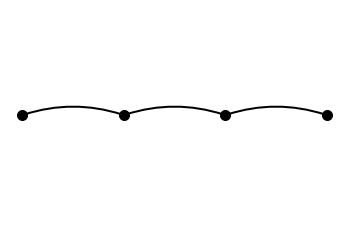

-------
Time step 1
1 (0, 1, 0) (1, 0, 0)
0 (0, 1, 1) (1, 0, 1)
1 (1, 2, 0) (2, 1, 0)
0 (1, 2, 1) (2, 1, 1)
1 (2, 3, 0) (3, 2, 0)
0 (2, 3, 1) (3, 2, 1)


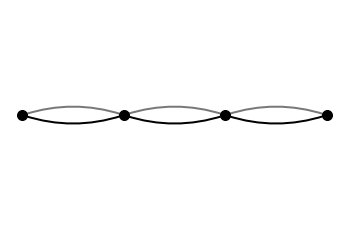

-------
Time step 2
2 (0, 1, 0) (1, 0, 0)
1 (0, 1, 1) (1, 0, 1)
0 (0, 1, 2) (1, 0, 2)
2 (1, 2, 0) (2, 1, 0)
1 (1, 2, 1) (2, 1, 1)
0 (1, 2, 2) (2, 1, 2)
2 (2, 3, 0) (3, 2, 0)
1 (2, 3, 1) (3, 2, 1)
0 (2, 3, 2) (3, 2, 2)


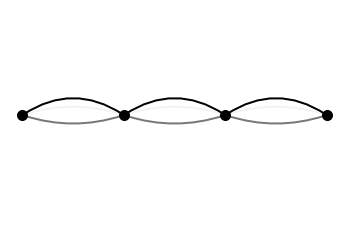

-------
Time step 3
0 (0, 1, 0) (1, 0, 0)
2 (0, 1, 1) (1, 0, 1)
1 (0, 1, 2) (1, 0, 2)
0 (1, 2, 0) (2, 1, 0)
2 (1, 2, 1) (2, 1, 1)
1 (1, 2, 2) (2, 1, 2)
0 (2, 3, 0) (3, 2, 0)
2 (2, 3, 1) (3, 2, 1)
1 (2, 3, 2) (3, 2, 2)


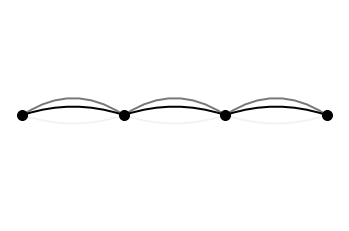

-------
Time step 4
1 (0, 1, 0) (1, 0, 0)
0 (0, 1, 1) (1, 0, 1)
2 (0, 1, 2) (1, 0, 2)
1 (1, 2, 0) (2, 1, 0)
0 (1, 2, 1) (2, 1, 1)
2 (1, 2, 2) (2, 1, 2)
1 (2, 3, 0) (3, 2, 0)
0 (2, 3, 1) (3, 2, 1)
2 (2, 3, 2) (3, 2, 2)


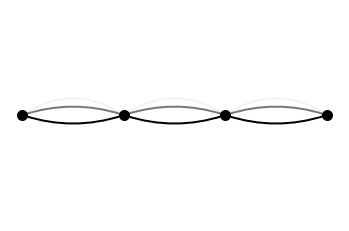

In [19]:
imp.reload(main)
imp.reload(pltm)

registers = main.create_qubit_registers(A, r)
for t in range(max_steps):
    print('-------')
    print('Time step',t)
    registers = main.cutoffs(registers, cutoff)
    registers = main.advance_time(registers)
    registers = main.generate_all_links(registers, p)
    pltm.plot_entangled_links(registers, cutoff, layout=layout, show_link_data=True)

---

# GEN in a squared grid

In [24]:
# Inputs
l = 3 # Number of nodes is l^2
p = 0.6
r = 3
cutoff = 2

# Topology
A = main.adjacency_squared(l)
layout = 'squared'

# Numerical
max_steps = 5
randomseed = 2
np.random.seed(randomseed)

-------
Time step 0
0 (0, 1, 0) (1, 0, 0)
0 (0, 2, 0) (2, 0, 0)
0 (0, 3, 0) (3, 0, 0)
0 (0, 6, 0) (6, 0, 0)
0 (1, 2, 0) (2, 1, 0)
0 (1, 4, 0) (4, 1, 0)
0 (1, 7, 0) (7, 1, 0)
0 (2, 8, 0) (8, 2, 0)
0 (3, 4, 0) (4, 3, 0)
0 (3, 6, 0) (6, 3, 0)
0 (4, 5, 0) (5, 4, 0)
0 (4, 7, 0) (7, 4, 0)
0 (5, 8, 0) (8, 5, 0)
0 (7, 8, 0) (8, 7, 0)


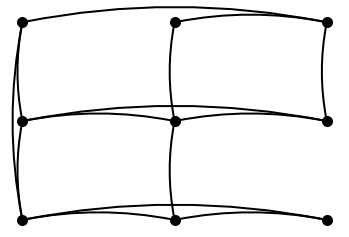

-------
Time step 1
1 (0, 1, 0) (1, 0, 0)
1 (0, 2, 0) (2, 0, 0)
0 (0, 2, 1) (2, 0, 1)
1 (0, 3, 0) (3, 0, 0)
0 (0, 3, 1) (3, 0, 1)
1 (0, 6, 0) (6, 0, 0)
0 (0, 6, 1) (6, 0, 1)
1 (1, 2, 0) (2, 1, 0)
0 (1, 2, 1) (2, 1, 1)
1 (1, 4, 0) (4, 1, 0)
0 (1, 4, 1) (4, 1, 1)
1 (1, 7, 0) (7, 1, 0)
0 (1, 7, 1) (7, 1, 1)
0 (2, 5, 0) (5, 2, 0)
1 (2, 8, 0) (8, 2, 0)
0 (2, 8, 1) (8, 2, 1)
1 (3, 4, 0) (4, 3, 0)
0 (3, 4, 1) (4, 3, 1)
0 (3, 5, 0) (5, 3, 0)
1 (3, 6, 0) (6, 3, 0)
0 (3, 6, 1) (6, 3, 1)
1 (4, 5, 0) (5, 4, 0)
0 (4, 5, 1) (5, 4, 1)
1 (4, 7, 0) (7, 4, 0)
0 (4, 7, 1) (7, 4, 1)
1 (5, 8, 0) (8, 5, 0)
0 (6, 7, 0) (7, 6, 0)
0 (6, 8, 0) (8, 6, 0)
1 (7, 8, 0) (8, 7, 0)
0 (7, 8, 1) (8, 7, 1)


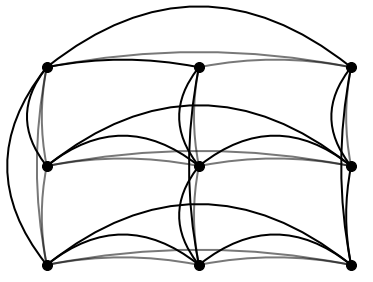

-------
Time step 2
2 (0, 1, 0) (1, 0, 0)
2 (0, 2, 0) (2, 0, 0)
1 (0, 2, 1) (2, 0, 1)
0 (0, 2, 2) (2, 0, 2)
2 (0, 3, 0) (3, 0, 0)
1 (0, 3, 1) (3, 0, 1)
0 (0, 3, 2) (3, 0, 2)
2 (0, 6, 0) (6, 0, 0)
1 (0, 6, 1) (6, 0, 1)
2 (1, 2, 0) (2, 1, 0)
1 (1, 2, 1) (2, 1, 1)
2 (1, 4, 0) (4, 1, 0)
1 (1, 4, 1) (4, 1, 1)
0 (1, 4, 2) (4, 1, 2)
2 (1, 7, 0) (7, 1, 0)
1 (1, 7, 1) (7, 1, 1)
1 (2, 5, 0) (5, 2, 0)
0 (2, 5, 1) (5, 2, 1)
2 (2, 8, 0) (8, 2, 0)
1 (2, 8, 1) (8, 2, 1)
0 (2, 8, 2) (8, 2, 2)
2 (3, 4, 0) (4, 3, 0)
1 (3, 4, 1) (4, 3, 1)
0 (3, 4, 2) (4, 3, 2)
1 (3, 5, 0) (5, 3, 0)
0 (3, 5, 1) (5, 3, 1)
2 (3, 6, 0) (6, 3, 0)
1 (3, 6, 1) (6, 3, 1)
2 (4, 5, 0) (5, 4, 0)
1 (4, 5, 1) (5, 4, 1)
0 (4, 5, 2) (5, 4, 2)
2 (4, 7, 0) (7, 4, 0)
1 (4, 7, 1) (7, 4, 1)
2 (5, 8, 0) (8, 5, 0)
0 (5, 8, 1) (8, 5, 1)
1 (6, 7, 0) (7, 6, 0)
0 (6, 7, 1) (7, 6, 1)
1 (6, 8, 0) (8, 6, 0)
0 (6, 8, 1) (8, 6, 1)
2 (7, 8, 0) (8, 7, 0)
1 (7, 8, 1) (8, 7, 1)


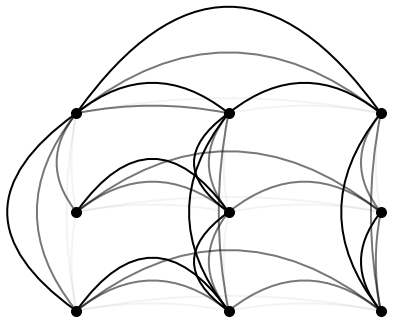

-------
Time step 3
0 (0, 1, 0) (1, 0, 0)
0 (0, 2, 0) (2, 0, 0)
2 (0, 2, 1) (2, 0, 1)
1 (0, 2, 2) (2, 0, 2)
0 (0, 3, 0) (3, 0, 0)
2 (0, 3, 1) (3, 0, 1)
1 (0, 3, 2) (3, 0, 2)
0 (0, 6, 0) (6, 0, 0)
2 (0, 6, 1) (6, 0, 1)
2 (1, 2, 1) (2, 1, 1)
2 (1, 4, 1) (4, 1, 1)
1 (1, 4, 2) (4, 1, 2)
2 (1, 7, 1) (7, 1, 1)
2 (2, 5, 0) (5, 2, 0)
1 (2, 5, 1) (5, 2, 1)
2 (2, 8, 1) (8, 2, 1)
1 (2, 8, 2) (8, 2, 2)
0 (3, 4, 0) (4, 3, 0)
2 (3, 4, 1) (4, 3, 1)
1 (3, 4, 2) (4, 3, 2)
2 (3, 5, 0) (5, 3, 0)
1 (3, 5, 1) (5, 3, 1)
0 (3, 5, 2) (5, 3, 2)
0 (3, 6, 0) (6, 3, 0)
2 (3, 6, 1) (6, 3, 1)
0 (4, 5, 0) (5, 4, 0)
2 (4, 5, 1) (5, 4, 1)
1 (4, 5, 2) (5, 4, 2)
0 (4, 7, 0) (7, 4, 0)
2 (4, 7, 1) (7, 4, 1)
1 (5, 8, 1) (8, 5, 1)
2 (6, 7, 0) (7, 6, 0)
1 (6, 7, 1) (7, 6, 1)
0 (6, 7, 2) (7, 6, 2)
2 (6, 8, 0) (8, 6, 0)
1 (6, 8, 1) (8, 6, 1)
0 (6, 8, 2) (8, 6, 2)
0 (7, 8, 0) (8, 7, 0)
2 (7, 8, 1) (8, 7, 1)


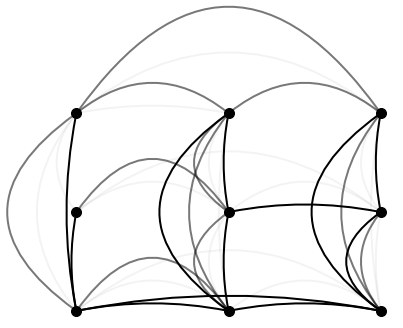

-------
Time step 4
1 (0, 1, 0) (1, 0, 0)
0 (0, 1, 1) (1, 0, 1)
1 (0, 2, 0) (2, 0, 0)
0 (0, 2, 1) (2, 0, 1)
2 (0, 2, 2) (2, 0, 2)
1 (0, 3, 0) (3, 0, 0)
2 (0, 3, 2) (3, 0, 2)
1 (0, 6, 0) (6, 0, 0)
0 (1, 2, 0) (2, 1, 0)
0 (1, 4, 0) (4, 1, 0)
2 (1, 4, 2) (4, 1, 2)
0 (2, 5, 0) (5, 2, 0)
2 (2, 5, 1) (5, 2, 1)
0 (2, 8, 0) (8, 2, 0)
2 (2, 8, 2) (8, 2, 2)
1 (3, 4, 0) (4, 3, 0)
0 (3, 4, 1) (4, 3, 1)
2 (3, 4, 2) (4, 3, 2)
2 (3, 5, 1) (5, 3, 1)
1 (3, 5, 2) (5, 3, 2)
1 (3, 6, 0) (6, 3, 0)
0 (3, 6, 1) (6, 3, 1)
1 (4, 5, 0) (5, 4, 0)
0 (4, 5, 1) (5, 4, 1)
2 (4, 5, 2) (5, 4, 2)
1 (4, 7, 0) (7, 4, 0)
0 (4, 7, 1) (7, 4, 1)
0 (5, 8, 0) (8, 5, 0)
2 (5, 8, 1) (8, 5, 1)
0 (6, 7, 0) (7, 6, 0)
2 (6, 7, 1) (7, 6, 1)
1 (6, 7, 2) (7, 6, 2)
2 (6, 8, 1) (8, 6, 1)
1 (6, 8, 2) (8, 6, 2)
1 (7, 8, 0) (8, 7, 0)
0 (7, 8, 1) (8, 7, 1)


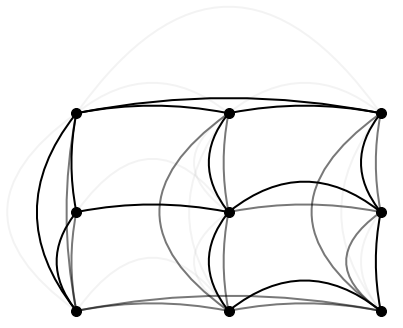

In [25]:
imp.reload(main)
imp.reload(pltm)

registers = main.create_qubit_registers(A, r)
for t in range(max_steps):
    print('-------')
    print('Time step',t)
    registers = main.cutoffs(registers, cutoff)
    registers = main.advance_time(registers)
    registers = main.generate_all_links(registers, p)
    pltm.plot_entangled_links(registers, cutoff, layout=layout, show_link_data=True)